In [1]:
from six.moves import cPickle
import os
import matplotlib.pyplot as plt
import numpy as np
import importlib
import utils as ut
from tqdm import tqdm
import mlp as mlp

Using TensorFlow backend.


# Data Preprocessing

In [60]:
importlib.reload(ut)
X_train, y_train, Y_train = ut.loadData('data_batch_1', clipping=True)
X_val, y_val, Y_val = ut.loadData('data_batch_2', clipping=True)
X_test, y_test, Y_test = ut.loadData('test_batch', clipping=True)

data = ut.preprocess_data(X_train, y_train, Y_train, X_val, y_val, Y_val, X_test, y_test, Y_test)
data["X_train"].shape

(3072, 10000)

In [12]:
X_train_whole, y_train_whole, Y_train_whole = ut.loadData('data_batch_1', clipping=True)
X_test, y_test, Y_test = ut.loadData('test_batch', clipping=True)
for i in range(2,6):
    X, y, Y = ut.loadData('data_batch_'+str(i), clipping=True)
    X_train_whole = np.concatenate((X, X_train_whole), axis=1)
    y_train_whole = np.concatenate((y, y_train_whole))
    Y_train_whole = np.concatenate((Y, Y_train_whole), axis=1)
n_val = 5000

X_val, y_val, Y_val = X_train_whole[:,-n_val:], y_train_whole[-n_val:], Y_train_whole[:,-n_val:]
X_train, y_train, Y_train = X_train_whole[:,:-n_val], y_train_whole[:-n_val], Y_train_whole[:,:-n_val]

data_5000 = ut.preprocess_data(X_train, y_train, Y_train, X_val, y_val, Y_val, X_test, y_test, Y_test)
data_5000["X_train"].shape

(3072, 45000)

In [13]:
X_train_whole, y_train_whole, Y_train_whole = ut.loadData('data_batch_1', clipping=True)
X_test, y_test, Y_test = ut.loadData('test_batch', clipping=True)
for i in range(2,6):
    X, y, Y = ut.loadData('data_batch_'+str(i), clipping=True)
    X_train_whole = np.concatenate((X, X_train_whole), axis=1)
    y_train_whole = np.concatenate((y, y_train_whole))
    Y_train_whole = np.concatenate((Y, Y_train_whole), axis=1)
n_val = 1000

X_val, y_val, Y_val = X_train_whole[:,-n_val:], y_train_whole[-n_val:], Y_train_whole[:,-n_val:]
X_train, y_train, Y_train = X_train_whole[:,:-n_val], y_train_whole[:-n_val], Y_train_whole[:,:-n_val]

data_1000 = ut.preprocess_data(X_train, y_train, Y_train, X_val, y_val, Y_val, X_test, y_test, Y_test)
data_1000["X_train"].shape

(3072, 49000)

# Exercise 1: Upgrade Assignment 2 code to train & test k-layer networks
## Check functions step by step

In [15]:
importlib.reload(mlp)
net = mlp.MLP()
bs = 20
X, Y = X_train[:, :bs], Y_train[:, :bs]
P = net.forward_pass(X)
P.shape

(10, 20)

In [16]:
importlib.reload(mlp)
net = mlp.MLP(lamda=0.01)
bs = 20
X, Y = X_train[:, :bs], Y_train[:, :bs]
c = net.compute_cost(X, Y)
c

(2.6225131126746075, 3.2170252533911072)

In [17]:
importlib.reload(mlp)
net = mlp.MLP()
bs = 1
X, Y = X_train[:, :bs], Y_train[:, :bs]
P = net.forward_pass(X)
net.compute_gradients(X, Y, P)
net.update_parameters()

## Check gradients
### 2 Layers network

In [163]:
importlib.reload(mlp)
bs, d = 1, 10
net = mlp.MLP(dims=[d, 50, 10])
X, Y = X_train[:d, :bs], Y_train[:d, :bs]
P = net.forward_pass(X)
net.compute_gradients(X, Y, P)
net.compare_gradients(X, Y, h=1e-5, eps=1e-6)

([6.013333226724553e-11, 2.8317506357107996e-10],
 [1.687168199298243e-11, 1.280215044619302e-10],
 [5.713307736632256e-12, 4.679546595598265e-12],
 [4.526346381039659e-12, 7.689155822471205e-12])

### 3 Layers network

In [162]:
importlib.reload(mlp)
bs, d = 1, 10
net = mlp.MLP(k=3, dims=[d, 50, 50, 10])
X, Y = X_train[:d, :bs], Y_train[:d, :bs]
P = net.forward_pass(X)
net.compute_gradients(X, Y, P)
net.compare_gradients(X, Y, h=1e-5, eps=1e-6)

([1.3775252477977655e-10, 5.309419249673503e-11, 1.8614948695050254e-10],
 [4.821418858340541e-11, 2.4701779297360278e-11, 3.5833998764694225e-10],
 [7.4653067460434e-12, 2.4467648546567384e-12, 2.983104547236992e-12],
 [7.438157312300575e-12, 5.661622143326994e-12, 4.765111872792605e-12])

### 4 Layers network

In [161]:
importlib.reload(mlp)
bs, d = 1, 10
net = mlp.MLP(k=4, dims=[d, 50, 50, 50, 10])
X, Y = X_train[:d, :bs], Y_train[:d, :bs]
P = net.forward_pass(X)
net.compute_gradients(X, Y, P)
net.compare_gradients(X, Y, h=1e-5, eps=1e-6)

([2.226819389527935e-09,
  1.5236944261034513e-10,
  1.686391073483283e-11,
  3.284103095149541e-08],
 [7.220392003327709e-10,
  5.1208557063709073e-11,
  3.269297074065724e-11,
  4.132661152473207e-08],
 [1.8362174341094145e-11,
  7.2159238997254734e-12,
  4.5896484779373025e-12,
  8.441599764183402e-12],
 [1.3468094255944183e-11,
  1.3332359244389025e-11,
  9.458275690432671e-12,
  1.471456987628254e-11])

### Different batch sizes and lamdas

In [20]:
batch_size = [1, 32, 64, 100]
lambdas = [0, 0.1, 1]

for l in lambdas:
    for bs in batch_size:
        X, Y = X_train[:d, :bs], Y_train[:d, :bs]
        net = mlp.MLP(dims=[d, 50, 10], lamda=l)
        P = net.forward_pass(X)
        net.compute_gradients(X, Y, P)
        rerr_w, rerr_b, aerr_w, aerr_b = net.compare_gradients(X, Y, h=1e-5, eps=1e-6)
        print(f'Batch size: {bs} - Lambda {l}->\n relative_error on gWs {rerr_w} \n relative_error on gbs {rerr_b} \n absolute error on gWs {aerr_w} \n absolute error on gbs {aerr_b}   ')

Batch size: 1 - Lambda 0->
 relative_error on gWs [6.842173318640139e-09, 2.486442854455087e-10] 
 relative_error on gbs [1.6587616452790045e-10, 5.641024873722951e-11] 
 absolute error on gWs [4.899544291336755e-12, 4.539913783449534e-12] 
 absolute error on gbs [5.9559019782023934e-12, 9.097046727024605e-12]   
Batch size: 32 - Lambda 0->
 relative_error on gWs [2.0380855471494506e-09, 1.0605938098343417e-09] 
 relative_error on gbs [1.727229349902716e-09, 1.0047600337423127e-10] 
 absolute error on gWs [1.197043817709317e-11, 1.1487676655470932e-11] 
 absolute error on gbs [1.3269654952218108e-11, 8.14658826508996e-12]   
Batch size: 64 - Lambda 0->
 relative_error on gWs [2.951357358503917e-09, 9.160325403474943e-10] 
 relative_error on gbs [1.9418877923014626e-09, 1.2109216928272436e-09] 
 absolute error on gWs [1.1537261077715457e-11, 1.0964820135997335e-11] 
 absolute error on gbs [1.0975728432669959e-11, 1.0094720567267735e-11]   
Batch size: 100 - Lambda 0->
 relative_error on

## Try to train the network with mini batch gd

In [165]:
importlib.reload(mlp)
net = mlp.MLP(lamda=0, init=mlp.Initialization.XAVIER)
data_100 = {"X_train": X_train[:,:100], "y_train": y_train[:100], "Y_train": Y_train[:,:100], "X_val":X_val[:,:100], "y_val": y_val[:100], "Y_val": Y_val[:,:100]}
GDparams = {"n_batch":100, "n_epochs":200, "eta":1e-3, "exp":"test_grad"}
net.mini_batch_gd(data_100, GDparams, verbose=True, backup=True)

st=2.3538344938090447
Epoch 84: train_acc=0.2 | val_acc=0.09 | train_loss=2.1907486448908755 | val_loss=2.353778959785701 | train_cost=2.1907486448908755 | val_cost=2.353778959785701
 44%|████▍     | 88/200 [00:04<00:05, 22.32it/s]Epoch 85: train_acc=0.2 | val_acc=0.08 | train_loss=2.189727577358898 | val_loss=2.3537938713192643 | train_cost=2.189727577358898 | val_cost=2.3537938713192643
Epoch 86: train_acc=0.2 | val_acc=0.08 | train_loss=2.188694557766711 | val_loss=2.35376659105418 | train_cost=2.188694557766711 | val_cost=2.35376659105418
Epoch 87: train_acc=0.2 | val_acc=0.08 | train_loss=2.1876519035918407 | val_loss=2.353830077873294 | train_cost=2.1876519035918407 | val_cost=2.353830077873294
Epoch 88: train_acc=0.2 | val_acc=0.08 | train_loss=2.186604549685739 | val_loss=2.3538027239661092 | train_cost=2.186604549685739 | val_cost=2.3538027239661092
Epoch 89: train_acc=0.2 | val_acc=0.07 | train_loss=2.1855382994365375 | val_loss=2.3538884681544996 | train_cost=2.1855382994365

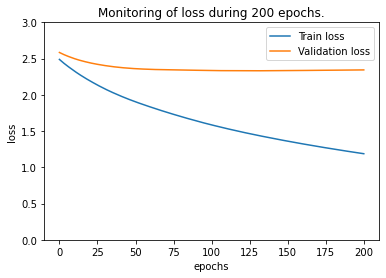

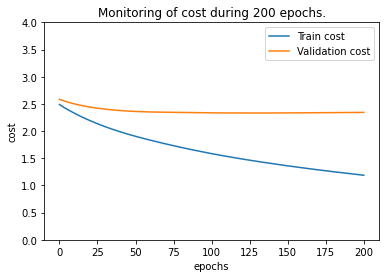

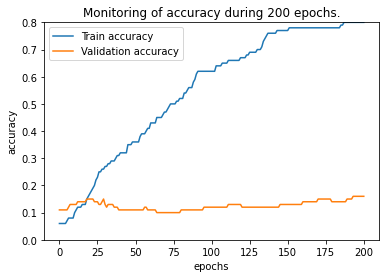

In [23]:
net.plot_metric(GDparams, metric="loss", cyclic=False)
net.plot_metric(GDparams, metric="cost", cyclic=False)
net.plot_metric(GDparams, metric="accuracy", cyclic=False)

# Exercise 2: Can I train multi-layer networks?
## Replicate results of assignement 2

In [168]:
importlib.reload(mlp)
net = mlp.MLP(lamda=.01, batch_norm=False, init=mlp.Initialization.XAVIER)
GDparams = {"n_cycles":1, "n_batch":100, "eta_min":1e-5, "eta_max":1e-1, "ns":500, "freq":10, "exp":"rep3"}
net.cyclic_learning(data, GDparams, verbose=True, backup=True)

100%|██████████| 10/10 [00:58<00:00,  5.82s/it]


In [169]:
net.layers

[<mlp.Layer at 0x197145397f0>, <mlp.Layer at 0x19702f3b240>]

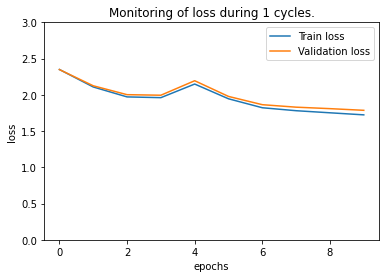

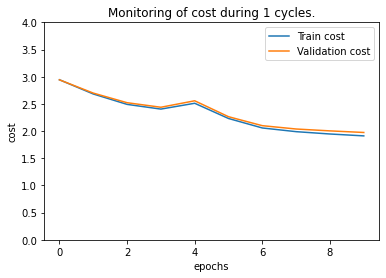

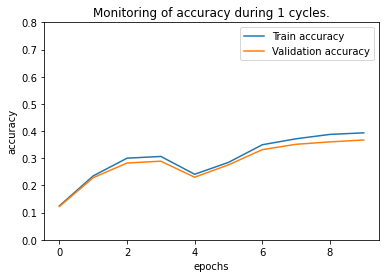

In [170]:
importlib.reload(mlp)
GDparams = {"n_cycles":1, "n_batch":100, "eta_min":1e-5, "eta_max":1e-1, "ns":500, "freq":10, "exp":"rep3"}
net = mlp.MLP.load_mlp(GDparams, lamda=0.01)
net.plot_metric(GDparams, metric="loss")
net.plot_metric(GDparams, metric="cost")
net.plot_metric(GDparams, metric="accuracy")

In [171]:
net.compute_accuracy(data["X_test"], data["y_test"])

0.3909

## Train a 3-layers network

100%|██████████| 20/20 [05:30<00:00, 16.51s/it]


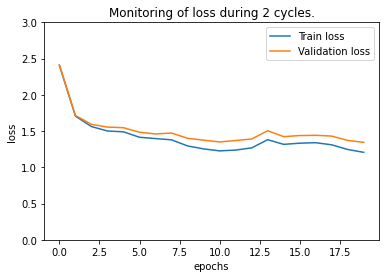

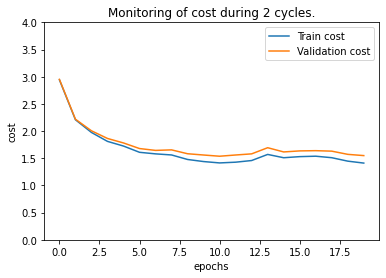

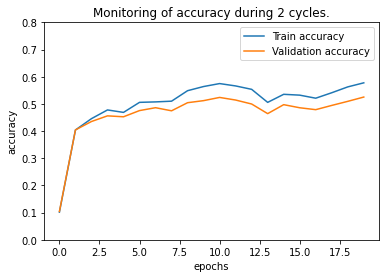

In [41]:
importlib.reload(mlp)
net = mlp.MLP(lamda=.005, k=3, dims=[3072,50,50,10])
GDparams = {"n_cycles":2, "n_batch":100, "eta_min":1e-5, "eta_max":1e-1, "ns":5*45000//100, "freq":10, "exp":"lay3"}
net.cyclic_learning(data_5000, GDparams, verbose=True, backup=True)
net.plot_metric(GDparams, metric="loss")
net.plot_metric(GDparams, metric="cost")
net.plot_metric(GDparams, metric="accuracy")

In [43]:
net.compute_accuracy(data_5000["X_test"], data_5000["y_test"])

0.5335

## Train a 9-layers network

100%|██████████| 20/20 [05:37<00:00, 16.87s/it]


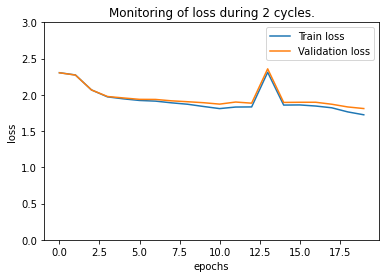

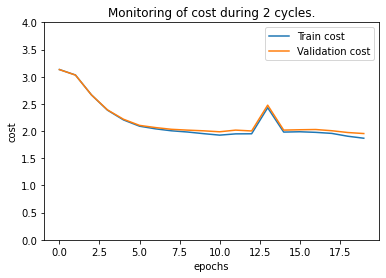

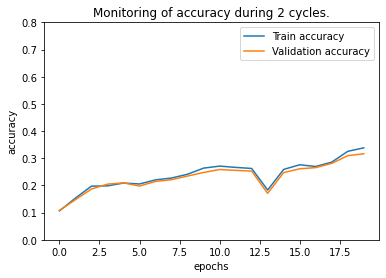

In [47]:
importlib.reload(mlp)
net = mlp.MLP(lamda=.005, k=9, dims=[3072, 50, 30, 20, 20, 10, 10, 10, 10,10])
GDparams = {"n_cycles":2, "n_batch":100, "eta_min":1e-5, "eta_max":1e-1, "ns":5*45000//100, "freq":10, "exp":"lay9"}
net.cyclic_learning(data_5000, GDparams, verbose=True, backup=True)
net.plot_metric(GDparams, metric="loss")
net.plot_metric(GDparams, metric="cost")
net.plot_metric(GDparams, metric="accuracy")

In [48]:
net.compute_accuracy(data_5000["X_test"], data_5000["y_test"])

0.3289

# Exercise 3: Implement batch normalization
## Check functions step by step

In [140]:
importlib.reload(mlp)
net = mlp.MLP(k=3, dims=[3072, 50, 50, 10], batch_norm=True)
bs = 20
X, Y = X_train[:, :bs], Y_train[:, :bs]
P = net.forward_pass(X, train_mode=True)
P.shape

(10, 20)

In [141]:
net.layers

In [148]:
importlib.reload(mlp)
net = mlp.MLP(k=3, dims=[3072, 50, 50, 10], batch_norm=True)
bs = 20
X, Y = X_train[:, :bs], Y_train[:, :bs]
c = net.compute_cost(X, Y, train_mode=True)
c

(3.1550427717314147, 3.1550427717314147)

In [152]:
importlib.reload(mlp)
net = mlp.MLP(k=3, dims=[3072, 50, 50, 10], batch_norm=True)
bs = 1
X, Y = X_train[:, :bs], Y_train[:, :bs]
P = net.forward_pass(X)
net.compute_gradients_bn(X, Y, P)
net.update_parameters()

## Check the gradients